# 1.월별 매출액 추세

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [2]:
entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/item_entry_data.csv')

In [3]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [4]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [5]:
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


In [6]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

In [7]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]

In [8]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',', '')

In [9]:
# salse_data의 결제금액을 숫자형태로 바꾸기
temp_var['payment'] = sales_data['결제금액'].astype(int)

In [10]:
# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['payment'].groupby(temp_var['date']).sum()
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

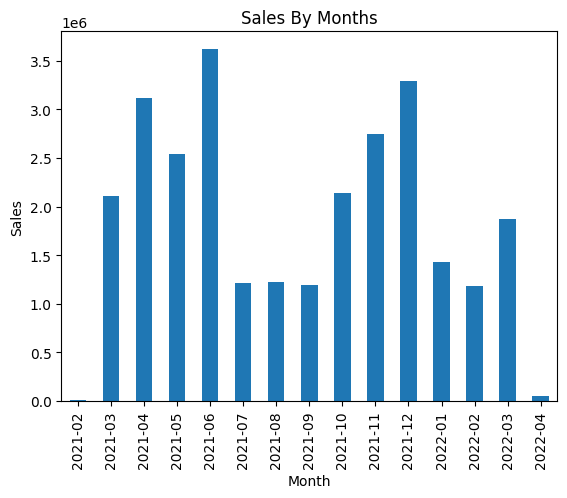

In [11]:
# 집계 결과를 시각화하기
ax = payment_data.plot(kind='bar')

plt.title('Sales By Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- 표를 시각화한 결과 월별로 매출금액을 자세히 알아볼수 있다.

# 2.가장 인기있는 음식/음료

In [12]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
# 주의! value_counts로 바로 집계하면 판매취소와 결제취소가 함께 집계됩니다.
# 따라서 '판매수량' 칼럼 값이 '-1'인 데이터를 제외하고 집계해야 합니다.
# 힌트 코드 : temp_var[temp_var['판매수량']==-1]
items_count = temp_var[temp_var['판매수량']!=-1].value_counts()
items_count

결제일시              판매위치  상품명         결제방식  비고    판매수량  결제금액  고객              date     payment
2021-10-05 13:33  선불기1  치즈추가        현금    결제완료  1     500   customer803089  2021-10  500        4
                        라면          현금    결제완료  1     4000  customer803089  2021-10  4000       4
2021-10-07 10:05  선불기1  시럽추가        신용카드  결제완료  1     500   customer777135  2021-10  500        4
2021-06-19 21:02  선불기1  라면          신용카드  결제완료  1     4000  customer283589  2021-06  4000       4
2021-06-14 11:37  선불기1  치즈추가        신용카드  결제완료  1     500   customer950393  2021-06  500        3
                                                                                               ..
2021-06-13 12:59  선불기1  계란추가        신용카드  결제완료  1     500   customer339447  2021-06  500        1
2021-06-13 11:46  선불기1  새우볶음밥       신용카드  결제완료  1     5000  customer950393  2021-06  5000       1
2021-06-13 10:33  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer983308  2021-06  5000       1
2021-06-13 10:00  선불기1  김

In [13]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count[:10]

0
결제일시             판매위치 상품명   결제방식 비고   판매수량 결제금액 고객             date    payment   
2021-10-05 13:33 선불기1 치즈추가  현금   결제완료 1    500  customer803089 2021-10 500      4
                      라면    현금   결제완료 1    4000 customer803089 2021-10 4000     4
2021-10-07 10:05 선불기1 시럽추가  신용카드 결제완료 1    500  customer777135 2021-10 500      4
2021-06-19 21:02 선불기1 라면    신용카드 결제완료 1    4000 customer283589 2021-06 4000     4
2021-06-14 11:37 선불기1 치즈추가  신용카드 결제완료 1    500  customer950393 2021-06 500      3
2021-03-23 13:41 선불기1 계란추가  신용카드 결제완료 1    500  customer556974 2021-03 500      3
2021-11-29 19:20 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer975556 2021-11 5000     3
2021-06-16 12:17 선불기1 라면    신용카드 결제완료 1    4000 customer996256 2021-06 4000     3
2021-08-22 17:12 선불기1 라면    신용카드 결제완료 1    4000 customer439220 2021-08 4000     3
2021-04-25 18:31 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer304481 2021-04 5000     3

In [14]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


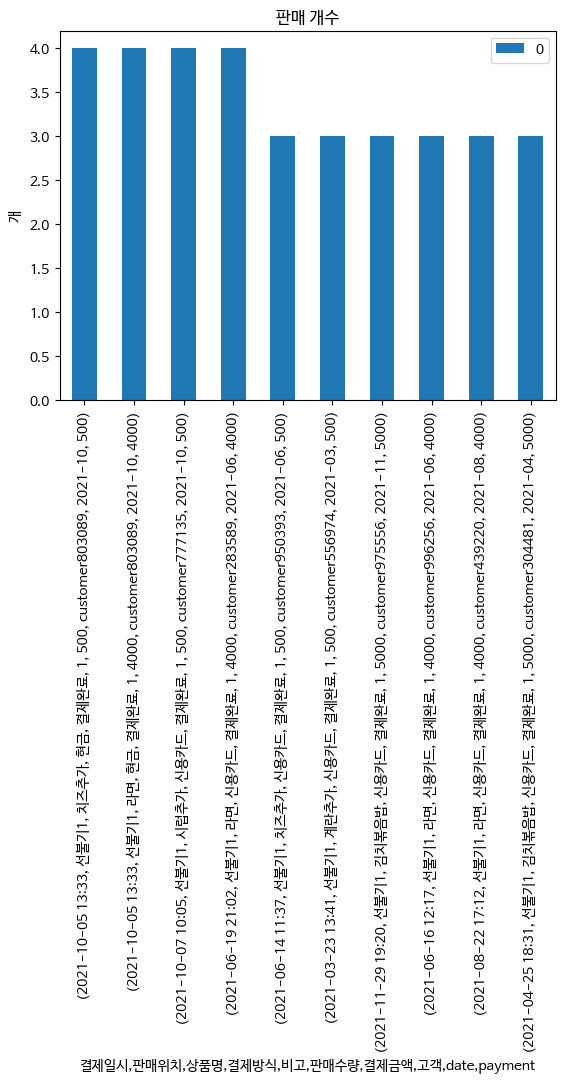

In [15]:
# 집계 결과를 시각화하기
items_count[:10].plot(kind='bar')
plt.ylabel('개')
plt.title('판매 개수')
plt.show()

In [16]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var['payment'].groupby(temp_var['상품명'][temp_var['판매수량']!=-1]).sum()
items_payment

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              114000
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           67500
Name: payment, Length: 100, dtype: int64

In [17]:
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(ascending=False)
items_payment[:10]

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: payment, dtype: int64

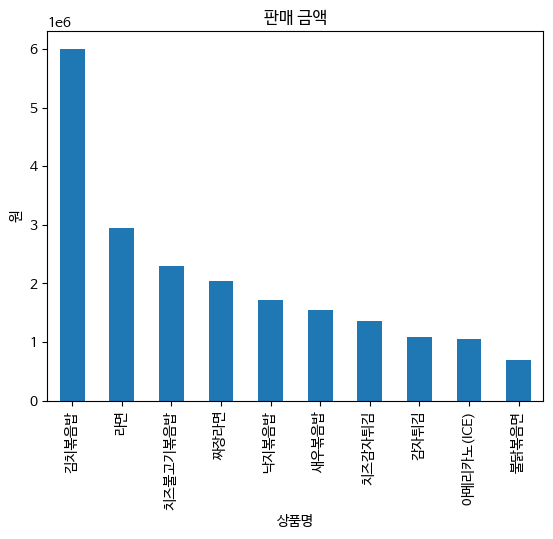

In [18]:
# 집계 결과 시각화하기
items_payment[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('판매 금액')
plt.show()

- 표를 시각화한 결과 제일 잘 팔린 음식은 김치볶음밥, 제일 잘 팔린 음료는 아메리카노(ICE)라는 것을 알 수 있다.

# 3. 가장 많이 팔린 입장권 종류

In [19]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [20]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [21]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

In [22]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = tickets.sort_values(ascending=False)
tickets[:10]

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

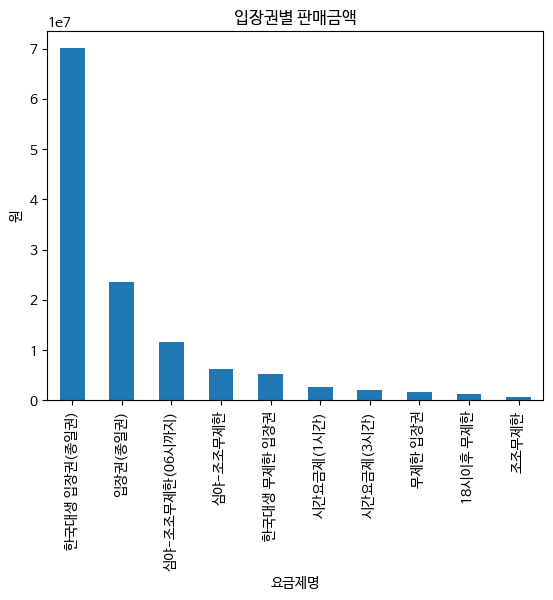

In [23]:
# 집계 결과 시각화하기
tickets[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('입장권별 판매금액')
plt.show()

- 표를 시각화한 결과 한국대생 입장권이 제일 많이 팔린것을 알수 있고, 조조무제한이 제일 판매가 저조합니다.

# 4. 내가 정의한 문제 해결하기

# -단골 고객을 찾아내어 많이 판매되는 메뉴가 무엇인지 찾아보자!!

In [109]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,4500
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,5500
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,4000
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,1000
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,5000


-필요없는 결측치 및 column 제거 (결제방식,비고,판매위치는 단골고객을 알아보기 위한 데이타가 아니므로 삭제,payment는 결제금액과 중복이므로 삭제

In [110]:
data = sales_data.drop(columns = ['비고', '결제방식', '판매위치', 'payment'])

# sales_data.reset_index(drop=False, inplace = True)
# sales_data.drop(columns = 'index', inplace = True)

data = data.dropna()

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 7095
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    6300 non-null   object
 1   상품명     6300 non-null   object
 2   판매수량    6300 non-null   int64 
 3   결제금액    6300 non-null   object
 4   고객      6300 non-null   object
 5   date    6300 non-null   object
dtypes: int64(1), object(5)
memory usage: 344.5+ KB
None


In [111]:
data['고객'] = data['고객'].astype('category')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 7095
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   결제일시    6300 non-null   object  
 1   상품명     6300 non-null   object  
 2   판매수량    6300 non-null   int64   
 3   결제금액    6300 non-null   object  
 4   고객      6300 non-null   category
 5   date    6300 non-null   object  
dtypes: category(1), int64(1), object(4)
memory usage: 387.6+ KB


,결제일시,상품명,판매수량,결제금액,고객,date
0,2022-04-01 19:41,치킨카라아케 6pc,1,4500,customer275507,2022-04
1,2022-04-01 19:41,짜장라면(계란추가),1,5500,customer275507,2022-04
2,2022-04-01 19:41,라면,1,4000,customer275507,2022-04
3,2022-04-01 19:41,비엔나소세지(토핑),1,1000,customer275507,2022-04
4,2022-04-01 19:41,라면(계란/치즈추가),1,5000,customer275507,2022-04


-이제 고객 column에서 중복된값들이 많이 나온 데이터를 확인합니다.

In [113]:
gd = data['고객'].groupby(data['상품명'])

In [114]:
data[data['고객'] == 'customer275507']['결제일시'].unique()

array(['2022-04-01 19:41', '2022-03-20 20:06'], dtype=object)

In [115]:
user_list = data['고객'].unique()
user_list

['customer275507', 'customer977070', 'customer630809', 'customer255068', 'customer264394', ..., 'customer330305', 'customer437421', 'customer402576', 'customer357520', 'customer774105']
Length: 1972
Categories (1972, object): ['customer016004', 'customer111111', 'customer200167', 'customer200188', ..., 'customer999474', 'customer999584', 'customer999769', 'customer999998']

In [119]:
real_list = []

for user in user_list:
    print(user)
    if len(data[data['고객'] == user]['결제일시'].unique()) >=3:
       real_list.append(user)
        
real_list

customer275507
customer977070
customer630809
customer255068
customer264394
customer490619
customer751113
customer897964
customer408718
customer724529
customer271499
customer279438
customer923103
customer396942
customer414283
customer390928
customer253742
customer976580
customer467216
customer983308
customer286156
customer440879
customer278853
customer553616
customer621953
customer476207
customer869081
customer556293
customer861644
customer557108
customer920430
customer294132
customer911896
customer715620
customer579767
customer501329
customer419087
customer886923
customer016004
customer836036
customer393921
customer675297
customer979011
customer898458
customer552172
customer898770
customer994026
customer530463
customer414895
customer439396
customer484215
customer862814
customer300202
customer873304
customer221102
customer901892
customer903463
customer945633
customer949607
customer428023
customer772724
customer919345
customer630480
customer248143
customer534349
customer514741
customer96

['customer977070',
 'customer630809',
 'customer408718',
 'customer279438',
 'customer414283',
 'customer390928',
 'customer467216',
 'customer983308',
 'customer476207',
 'customer556293',
 'customer861644',
 'customer294132',
 'customer501329',
 'customer675297',
 'customer994026',
 'customer530463',
 'customer300202',
 'customer903463',
 'customer630480',
 'customer514741',
 'customer879920',
 'customer384598',
 'customer722108',
 'customer914635',
 'customer424920',
 'customer339975',
 'customer944087',
 'customer879598',
 'customer575860',
 'customer988220',
 'customer349744',
 'customer535623',
 'customer407675',
 'customer940217',
 'customer381223',
 'customer499864',
 'customer254481',
 'customer824285',
 'customer852776',
 'customer730757',
 'customer582708',
 'customer473326',
 'customer847542',
 'customer411556',
 'customer480421',
 'customer351426',
 'customer337003',
 'customer241622',
 'customer367417',
 'customer996847',
 'customer581973',
 'customer254811',
 'customer88

## -퍼실님(진표님)의 도움으로 단골고객은 추리는데에 성공하였으나 단골고객의 단골상품을 추리는데에 시간부족으로 해결하지 못함.
-for문을 이용하여 고객 column에서 3번이상 결제한 고객들의 중복값을 얻어내어 결제일시의 값들 중 중복값을 찾아 내어 단골상품을 추리러 하였음.

# 회고

#### -column제거 시에 data = sales_data.dropna() 이 부분으로 인해 삭제되지 않았던 column을 코드 삭제 후 출력시  제거되는 현상을 겪음.

#### -단골 고객을 확인하기 위해 함수를 이용하여 고객 column 중 중복되는 데이터를 확인하려고 하였으나 도저히 개인적으로 해결이 불가한 상황이어서 퍼실님께 요청드렸으나 시간부족으로 해결 못하고 중간 제출하게 됨을 양해바랍니다.
 
#### -현재 한국대학교가 만약 이전을 한다라고 하면 매출이 급격하게 낮아질것이라 예상됨.

#### -이에 대한 대안으로 배달서비스를 도입하는것도 하나의 방법으로 여겨짐.

#### -판매가 되지 않거나 판매량이 적은 메뉴에 대한 삭제 재고 및 신메뉴 개발로 매출량을 증가시킬수 있다는 예측.

#### -방대한 양의 데이터를 그래프 및 표로 나타내어 본 결과 여기저기 대중없던 데이터들을 한눈에 볼수 있는 결과를 도출해내는 과정이 흥미로움.
#### -첫번째 프로젝트 결과물이 완성본이 되지 못한 부분은 추후에는 재발되지 않도록 노력하겠습니다!!